In [2]:
import networkx as nx
import osmnx as ox
import numpy as np
import pandas as pd
import geopandas as gpd
from shapely import LineString

In [4]:
city = 'tokyo'

#### 检测器

In [5]:
detectors = pd.read_csv("UTD19/detectors_public.csv").query("citycode == @city")
detectors = gpd.GeoDataFrame(detectors,geometry=gpd.points_from_xy(detectors.long,detectors.lat))
detectors.crs = "EPSG:4326"

In [7]:
print(detectors.crs)

EPSG:4326


      detid    length       pos   fclass           road limit citycode  lanes  \
17868     4  0.089831  0.080828  primary  ?????????????     0    tokyo    1.0   
17869     5  0.092086  0.075382  primary  ?????????????     0    tokyo    1.0   
17870   383  0.275742  0.126941  primary   ????????????     0    tokyo    1.0   
17871   384  0.275299  0.126559  primary   ????????????     0    tokyo    1.0   
17872   385  0.262979  0.118034  primary   ????????????     0    tokyo    1.0   

       linkid        long        lat                    geometry  
17868   639.0  139.795355  35.687989  POINT (139.79536 35.68799)  
17869   640.0  139.796177  35.687926  POINT (139.79618 35.68793)  
17870  1332.0  139.732110  35.691228  POINT (139.73211 35.69123)  
17871  1331.0  139.732096  35.691251  POINT (139.73210 35.69125)  
17872  1330.0  139.732218  35.691377  POINT (139.73222 35.69138)  


<Axes: >

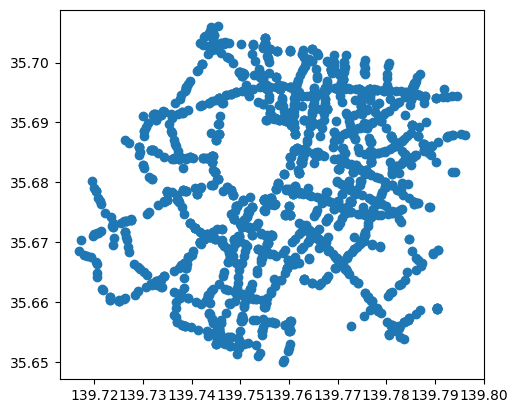

In [8]:
print(detectors.head())
detectors.plot()

#### 路网

In [9]:
links = pd.read_csv("UTD19/links.csv").query("citycode == @city")


In [10]:
links.groupby('linkid')

In [11]:
print(links.head())


              long        lat  order  piece  linkid  group citycode
106560  139.759591  35.682446      1      1       0    0.1    tokyo
106561  139.758953  35.681458      2      1       0    0.1    tokyo
106562  139.757788  35.679671      3      1       0    0.1    tokyo
106563  139.759613  35.682437      1      1       1    1.1    tokyo
106564  139.758991  35.681439      2      1       1    1.1    tokyo


#### 检测器数据

In [15]:
measurements = pd.read_csv("UTD19/utd19_u.csv")


C:\Users\DELL\AppData\Local\Temp\ipykernel_21144\3006221901.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  measurements = pd.read_csv("UTD19/utd19_u.csv")#.query("city == @city")


In [16]:
print(measurements.head())


          day  interval     detid  flow  occ  error      city  speed
0  2017-05-06         0  06.X-2li  12.0  0.0    1.0  augsburg    NaN
1  2017-05-06       300  06.X-2li  12.0  0.0    1.0  augsburg    NaN
2  2017-05-06       600  06.X-2li  12.0  0.0    1.0  augsburg    NaN
3  2017-05-06       900  06.X-2li  16.0  0.0    1.0  augsburg    NaN
4  2017-05-06      1200  06.X-2li  16.0  0.0    1.0  augsburg    NaN


In [23]:
print(pd.read_csv("UTD19/detectors_public.csv").citycode.value_counts().shape)
print(pd.read_csv("UTD19/links.csv").citycode.value_counts().shape)
print(measurements.city.value_counts().shape)

(40,)
(40,)
(39,)


In [3]:
pd.read_csv("UTD19/detectors_public.csv").citycode.value_counts()

citycode
london         5719
tokyo          1887
losanageles    1725
melbourne      1630
madrid         1116
utrecht        1072
zurich         1020
bern            755
augsburg        717
vilnius         581
bremen          548
munich          520
kassel          513
toulouse        478
taipeh          445
bordeaux        438
hamburg         419
torino          399
darmstadt       392
graz            300
stuttgart       298
rotterdam       259
paris           247
santander       219
toronto         188
speyer          184
manchester      181
marseille       169
bolton          166
luzern          158
strasbourg      142
wolfsburg       133
constance       122
cagliari        122
frankfurt       112
basel            77
birmingham       66
groningen        55
essen            38
innsbruck        16
Name: count, dtype: int64